In this notebook we will use lasso for feature selection on:
- the original dataset with all features
- the dataset with the all the features calculated with pyradiomics

## Dataset with calcualted features

In [1]:
library(glmnet)
library("survival")
library("survminer")

Warning message:
"package 'glmnet' was built under R version 3.6.2"
Loading required package: Matrix

Loaded glmnet 3.0-2


Warning message:
"package 'survival' was built under R version 3.6.2"
Warning message:
"package 'survminer' was built under R version 3.6.2"
Loading required package: ggplot2

Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 3.6.2"
Loading required package: magrittr



In [129]:
#we get the csv, and we don't keep the first column which is a dupe with the index
trainingA=read.csv('C:/Users/ddalt/Desktop/DSTI/Data Challenge/OWKIN/fullTrainingCalculatedRadioAge.csv')[,-1]
trainingA[,'Adenocarcinoma']=0
#we transform the factors into numericals
trainingA[trainingA$Histology=='adenocarcinoma','Adenocarcinoma']=1
trainingA[,'LargeCell']=0
trainingA[trainingA$Histology=='large cell','LargeCell']=1
trainingA[,'Squamous']=0
trainingA[trainingA$Histology=='squamous cell carcinoma','Squamous']=1
trainingA[,'Source']=0
trainingA[trainingA$SourceDataset=='l2','Source']=1
#we get read of the factors and we set the rownames as PatientID
rownames(trainingA)=trainingA$PatientID
trainingA=trainingA[,c(-1,-2,-5)]
# we scale all columns but PatientID, SurvivalTime and Event
trainingA=cbind(scale(trainingA[,c(-91, -92)]), trainingA[,c('SurvivalTime', 'Event')])
#we get rid of the row with NA values
trainingA=trainingA[!(is.na(trainingA$Mean)),]

In [4]:
dim(trainingA)

[1] 295  96

In [32]:
fit = cv.glmnet((as.matrix(trainingA[,c(-95,-96)])), Surv(trainingA$SurvivalTime, trainingA$Event),family = "cox", nfolds = 5, relax=TRUE)

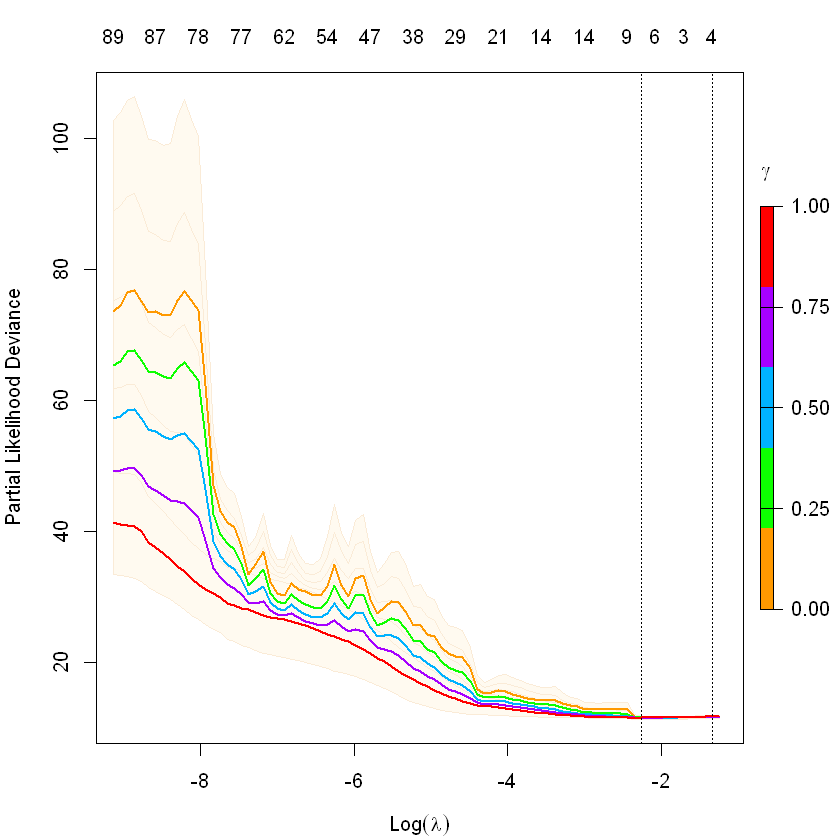

In [33]:
plot(fit)

In [23]:
names(fit$relaxed)

[1] "statlist"   "gamma"      "lambda.min" "lambda.1se" "gamma.min" 
[6] "gamma.1se"  "nzero.min"  "nzero.1se"

In [25]:
fit$relaxed$gamma.1se
fit$relaxed$lambda.1se

[1] 0.5

[1] 0.2419866

In [34]:
model = glmnet((as.matrix(trainingA[,c(-95,-96)])), Surv(trainingA$SurvivalTime, trainingA$Event),family = "cox", lambda=fit$relaxed$lambda.1se, gamma=fit$relaxed$gamma.1se)


In [35]:
model$beta

94 x 1 sparse Matrix of class "dgCMatrix"
                                            s0
Mstage                            .           
Nstage                            .           
Tstage                            .           
age                               .           
X10Percentile                     .           
X90Percentile                     .           
Energy                            .           
Entropy                           .           
InterquartileRange                .           
Kurtosis                          .           
Maximum                           .           
MeanAbsoluteDeviation             .           
Mean                              .           
Median                            .           
Minimum                           .           
Range                             .           
RobustMeanAbsoluteDeviation       .           
RootMeanSquared                   .           
Skewness                          .           
TotalEnergy       

## Original dataset

In [46]:
head(trainingB)

,Mstage,Nstage,Tstage,age,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,...,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,Adenocarcinoma,LargeCell,Squamous,Source,SurvivalTime,Event
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,-0.1273026,-0.8301892,-0.0963663,-0.2885868,0.2795003,0.1710857192,-0.4270877744,-0.4009040,0.3119030,-0.438976999,...,-0.15712933,0.03706072,-0.2197054,-0.61938598,1.4013313,-0.5043603,-0.5917602,1.4013313,1378,0
2,-0.1273026,0.8933870,1.7687880,-0.4375082,-0.4929972,-0.5862102807,0.3368184447,0.2427834,-0.4511557,0.009100365,...,-0.35833565,0.16439132,-0.2521198,-0.15307099,-0.7112284,1.9761004,-0.5917602,-0.7112284,379,1
3,-0.1273026,1.7551752,-0.0963663,-0.2838723,0.2043471,0.0911317330,0.1885350462,-0.3466214,0.2397123,0.026272212,...,-0.42487140,-0.80432535,-0.2026941,0.07411544,-0.7112284,-0.5043603,1.6842407,-0.7112284,573,1
4,-0.1273026,0.8933870,0.8362108,-0.9815022,0.1179161,0.0008528433,-0.4760683478,-0.2822511,0.1561782,-0.548760797,...,-0.26497843,-0.26178456,-0.2414001,-0.56751251,-0.7112284,-0.5043603,-0.5917602,-0.7112284,959,0
5,-0.1273026,1.7551752,1.7687880,0.2386982,-0.3842336,-0.4882371215,-0.2797143223,0.1391045,-0.3407194,-0.451265681,...,0.04481628,1.37486674,0.5330143,0.13104618,-0.7112284,-0.5043603,1.6842407,-0.7112284,2119,0
6,-0.1273026,0.8933870,-0.0963663,-0.3906769,0.7891273,0.7489783379,0.0004058122,-0.7325747,0.7912429,-0.161160433,...,-0.47561131,-0.45480730,-0.1722022,0.88662900,-0.7112284,-0.5043603,1.6842407,-0.7112284,706,1


In [102]:
trainingB=read.csv('C:/Users/ddalt/Desktop/DSTI/Data Challenge/OWKIN/fullTrainingSet.csv')
#we transform the factors into numericals
trainingB[,'Adenocarcinoma']=0
trainingB[trainingB$Histology=='adenocarcinoma','Adenocarcinoma']=1
trainingB[,'LargeCell']=0
trainingB[trainingB$Histology=='large cell','LargeCell']=1
trainingB[,'Squamous']=0
trainingB[trainingB$Histology=='squamous cell carcinoma','Squamous']=1
trainingB[,'Source']=0
trainingB[trainingB$SourceDataset=='l2','Source']=1
#we get read of the factors and we set the rownames as PatientID
rownames(trainingB)=trainingB$PatientID
trainingB=trainingB[,c(-1,-2,-5)]
# we scale all columns SurvivalTime and Event
trainingB=cbind(scale(trainingB[,c(-58, -59)]), trainingB[,c('SurvivalTime', 'Event')])
#we set NA values to zero
trainingB[(is.na(trainingB$age)),'age']=0

In [84]:
fitB = cv.glmnet((as.matrix(trainingB[,c(-62,-63)])), Surv(trainingB$SurvivalTime, trainingB$Event),family = "cox", nfolds = 5, relax=TRUE)
fitB
plot(fitB)

In [105]:
modelB = glmnet((as.matrix(trainingB[,c(-62,-63)])), Surv(trainingB$SurvivalTime, trainingB$Event),family = "cox", lambda=fitB$relaxed$lambda.1se,  gamma=fitB$relaxed$gamma.1se)
modelB$beta

61 x 1 sparse Matrix of class "dgCMatrix"
                                                       s0
Mstage                                        .          
Nstage                                        .          
Tstage                                        .          
age                                           .          
original_shape_Compactness1                   .          
original_shape_Compactness2                   .          
original_shape_Maximum3DDiameter              .          
original_shape_SphericalDisproportion         .          
original_shape_Sphericity                     .          
original_shape_SurfaceArea                    .          
original_shape_SurfaceVolumeRatio             .          
original_shape_VoxelVolume                    .          
original_firstorder_Energy                    .          
original_firstorder_Entropy                   .          
original_firstorder_Kurtosis                  .          
original_firstorder_Maximum   

## Let's try now to combine all features

In [139]:
trainingC=cbind(trainingA[,c(-95, -96)], trainingB[(row.names(trainingB) %in% row.names(trainingA)),c(-1,-2,-3,-4,-58,-59,-60, -61)])

In [142]:
head(trainingC)

,Mstage,Nstage,Tstage,age,X10Percentile,X90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,...,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,SurvivalTime,Event
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
202,-0.1273026,-0.8301892,-0.0963663,-0.2925525,-1.1805834,0.14353104,0.2568743,1.0177006,1.7461510,-0.49263174,...,-0.23147595,0.86563476,-0.1709005,-0.26845960,-0.15712933,0.03706072,-0.2197054,-0.61938598,1378,0
371,-0.1273026,0.8933870,1.7687880,-0.4455398,-0.2770500,0.17169310,0.1037444,0.2718879,0.1629818,-0.37703123,...,0.03817729,-0.03022133,-0.3329506,0.10750816,-0.35833565,0.16439132,-0.2521198,-0.15307099,379,1
246,-0.1273026,1.7551752,-0.0963663,-0.2877094,0.7770724,-0.10992750,-0.3487685,-0.9152788,-0.8892168,-0.08631380,...,-0.09547868,-0.89876962,-0.3780277,-0.47474769,-0.42487140,-0.80432535,-0.2026941,0.07411544,573,1
240,-0.1273026,0.8933870,0.8362108,-1.0043859,0.1251326,-0.05360338,-0.4209226,0.1011916,-0.3679888,-0.30413948,...,-0.44662327,0.41382578,-0.2579194,-0.39835220,-0.26497843,-0.26178456,-0.2414001,-0.56751251,959,0
284,-0.1273026,1.7551752,1.7687880,0.2491283,0.3106141,0.36882752,-0.3861156,-0.2168322,-0.8015336,-0.01340705,...,-0.46152904,-0.25282586,0.2169860,1.25276457,0.04481628,1.37486674,0.5330143,0.13104618,2119,0
348,-0.1273026,0.8933870,-0.0963663,-0.3974299,0.9423529,-0.03952235,-0.3869989,-1.3420059,-1.1376526,0.10412575,...,-0.32023983,-1.45171499,-0.4179218,0.03463561,-0.47561131,-0.45480730,-0.1722022,0.88662900,706,1


Warning message:
"from glmnet Fortran code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"
Warning message in getcoef(fit, nvars, nx, vnames):
"an empty model has been returned; probably a convergence issue"
Warning message:
"from glmnet Fortran code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"
Warning message in getcoef(fit, nvars, nx, vnames):
"an empty model has been returned; probably a convergence issue"
Warning message:
"from glmnet Fortran code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"
Warning message in getcoef(fit, nvars, nx, vnames):
"an empty model has been returned; probably a convergence issue"
Warning message:
"from glmnet Fortran code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 

Warning message in getcoef(fit, nvars, nx, vnames):
"an empty model has been returned; probably a convergence issue"
Warning message:
"from glmnet Fortran code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"
Warning message in getcoef(fit, nvars, nx, vnames):
"an empty model has been returned; probably a convergence issue"
Warning message:
"from glmnet Fortran code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"
Warning message in getcoef(fit, nvars, nx, vnames):
"an empty model has been returned; probably a convergence issue"
Warning message:
"from glmnet Fortran code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"
Warning message in getcoef(fit, nvars, nx, vnames):
"an empty model has been returned; probably a convergence issue"
Warning

Warning message:
"from glmnet Fortran code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"
Warning message in getcoef(fit, nvars, nx, vnames):
"an empty model has been returned; probably a convergence issue"
Warning message:
"from glmnet Fortran code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"
Warning message in getcoef(fit, nvars, nx, vnames):
"an empty model has been returned; probably a convergence issue"
Warning message:
"from glmnet Fortran code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"
Warning message in getcoef(fit, nvars, nx, vnames):
"an empty model has been returned; probably a convergence issue"
Warning message:
"from glmnet Fortran code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 


Call:  cv.glmnet(x = (as.matrix(trainingC[, c(-148, -149)])), y = Surv(trainingC$SurvivalTime,      trainingC$Event), nfolds = 5, relax = TRUE, family = "cox") 

Measure: Partial Likelihood Deviance 

    Gamma  Lambda Measure     SE Nonzero
min  0.75 0.08697   11.45 0.1722      10
1se  0.75 0.26558   11.60 0.1680       4

147 x 1 sparse Matrix of class "dgCMatrix"
                                                      s0
Mstage                                        .         
Nstage                                        .         
Tstage                                        .         
age                                           .         
X10Percentile                                 .         
X90Percentile                                 .         
Energy                                        .         
Entropy                                       .         
InterquartileRange                            .         
Kurtosis                                      .         
Maximum                                       .         
MeanAbsoluteDeviation                         .         
Mean                                          .         
Median                                        .         
Minimum                                       .         
Range                                        

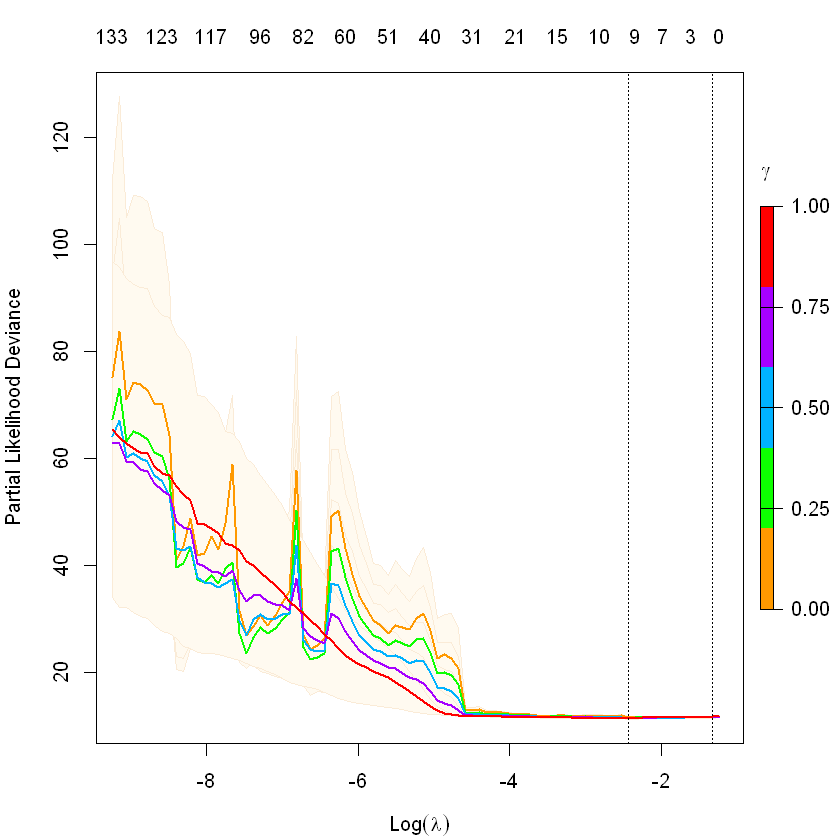

In [147]:
fitC = cv.glmnet((as.matrix(trainingC[,c(-148,-149)])), Surv(trainingC$SurvivalTime, trainingC$Event),family = "cox", nfolds = 5, relax=TRUE)
fitC
plot(fitC)
modelC = glmnet((as.matrix(trainingC[,c(-148,-149)])), Surv(trainingC$SurvivalTime, trainingC$Event),family = "cox", lambda=fitB$lambda.1se)
modelC$beta

## New data selection

In [2]:
data=read.csv('C:/Users/ddalt/Desktop/DSTI/Data Challenge/OWKIN/exportForDataSelection.csv')

In [4]:
dim(data)

[1] 300  66

In [13]:
fit$relaxed$lambda.1se

[1] 0.2421682

In [10]:
fit = cv.glmnet((as.matrix(data[,c(-65,-66)])), Surv(data$SurvivalTime, data$Event),family = "cox", nfolds = 300, relax=False)


Call:  cv.glmnet(x = (as.matrix(data[, c(-65, -66)])), y = Surv(data$SurvivalTime,      data$Event), nfolds = 300, relax = TRUE, family = "cox") 

Measure: Partial Likelihood Deviance 

    Gamma  Lambda Measure      SE Nonzero
min  0.50 0.05999   10.35 0.08194      10
1se  0.25 0.24217   10.41 0.07916       3

64 x 1 sparse Matrix of class "dgCMatrix"
                                                       s0
PatientID                                     .          
Mstage                                        0.029992905
Nstage                                        0.090645830
SourceDataset                                -0.316237387
Tstage                                        .          
age                                           0.084518016
original_shape_Compactness1                   .          
original_shape_Compactness2                   .          
original_shape_Maximum3DDiameter              .          
original_shape_SphericalDisproportion         .          
original_shape_Sphericity                     .          
original_shape_SurfaceArea                    .          
original_shape_SurfaceVolumeRatio             .          
original_shape_VoxelVolume                    0.076399191
original_firstorder_Energy                    .          
original_firstorder_Entropy   

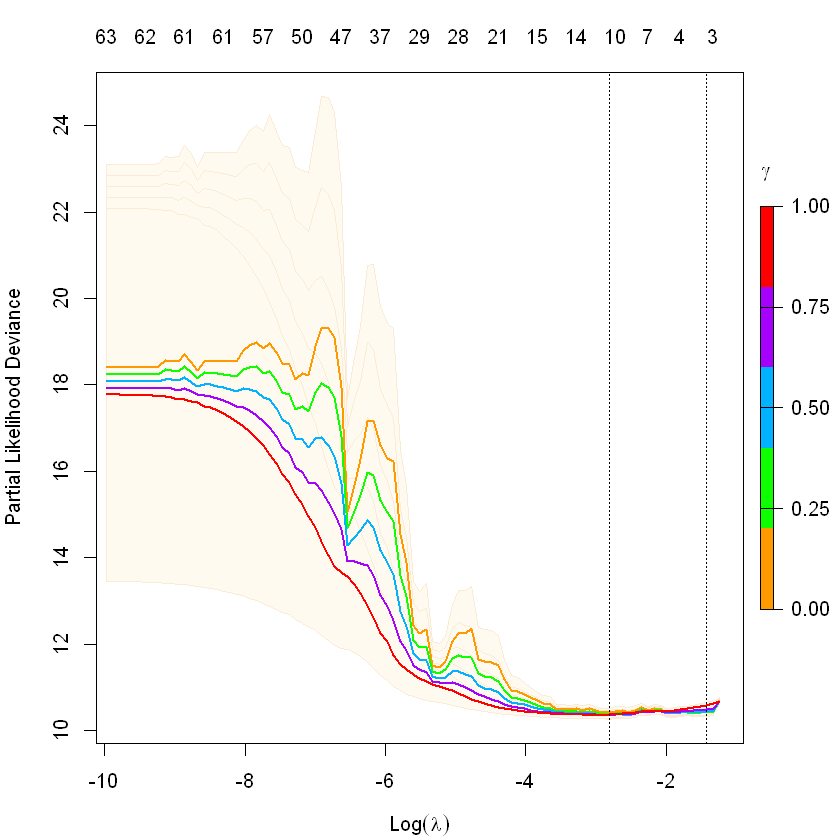

In [14]:
fit
plot(fit)
model = glmnet((as.matrix(data[,c(-65,-66)])), Surv(data$SurvivalTime, data$Event),family = "cox",lambda=fit$relaxed$lambda.min,  gamma=fit$relaxed$gamma.min)
model$beta

In [16]:
#fit2 = cv.glmnet((as.matrix(data[,c(-65,-66)])), Surv(data$SurvivalTime, data$Event),family = "cox", nfolds = 250, relax=TRUE)
#fit2
#plot(fit2)
model2 = glmnet((as.matrix(data[,c(-65,-66)])), Surv(data$SurvivalTime, data$Event),family = "cox", lambda=fit2$relaxed$lambda.min,  gamma=fit2$relaxed$gamma.min)
model2$beta
fit2$relaxed$lambda.min

64 x 1 sparse Matrix of class "dgCMatrix"
                                                       s0
PatientID                                     .          
Mstage                                        0.029992905
Nstage                                        0.090645830
SourceDataset                                -0.316237387
Tstage                                        .          
age                                           0.084518016
original_shape_Compactness1                   .          
original_shape_Compactness2                   .          
original_shape_Maximum3DDiameter              .          
original_shape_SphericalDisproportion         .          
original_shape_Sphericity                     .          
original_shape_SurfaceArea                    .          
original_shape_SurfaceVolumeRatio             .          
original_shape_VoxelVolume                    0.076399191
original_firstorder_Energy                    .          
original_firstorder_Entropy   

[1] 0.05998692

In [39]:
model3 = glmnet((as.matrix(data[,c(-65,-66)])), Surv(data$SurvivalTime, data$Event),family = "cox", lambda=0.030)
model3$beta

64 x 1 sparse Matrix of class "dgCMatrix"
                                                       s0
PatientID                                     .          
Mstage                                        0.073422344
Nstage                                        0.140464708
SourceDataset                                -0.387609924
Tstage                                        .          
age                                           0.162215449
original_shape_Compactness1                   .          
original_shape_Compactness2                   .          
original_shape_Maximum3DDiameter              .          
original_shape_SphericalDisproportion         .          
original_shape_Sphericity                     .          
original_shape_SurfaceArea                    .          
original_shape_SurfaceVolumeRatio             .          
original_shape_VoxelVolume                    .          
original_firstorder_Energy                    .          
original_firstorder_Entropy   